## BATCH ID : 13-MAY-24-CDS-BUN-021-WDM09-BAN

## PROJECT : PRCP-1018-BikeRental

## PROBLEM STATEMENT :
Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


# INTRODUCTION TO THE PROJECT

Bike sharing systems automate the entire process of renting and returning bicycles, with over 500 programs worldwide. These systems are crucial for traffic, environmental, and health issues. They generate data that can be used for research, as they record travel duration, departure, and arrival positions, making them a virtual sensor network for city mobility. This data could help detect important events in cities.

So ,this project's goal is to predict the daily bike rental count based on the environmental and seasonal settings.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOADED THE DATA

In [2]:
df = pd.read_csv(r"C:\Users\Nakshatra\Documents\hour.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# BASIC CHECKS

In [4]:
df.shape

(17379, 17)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
df=df.drop(['instant', 'dteday','casual', 'registered'],axis=1)

In [11]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


# EDA

# UNIVARIANT ANALYSIS

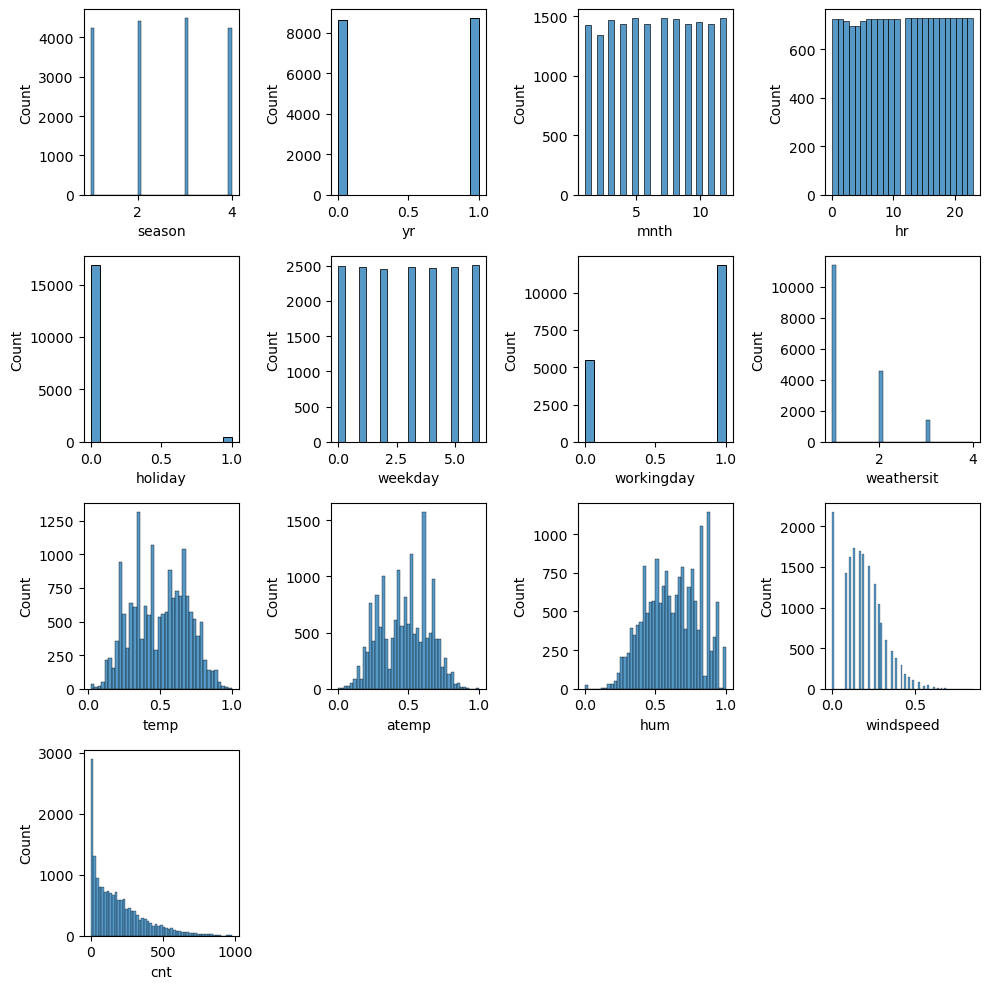

In [12]:
plt.figure(figsize=(10,10))
plot=1

for i in df:
    ax=plt.subplot(4,4,plot)
    sns.histplot(x=df[i])
    plot+=1

plt.tight_layout()
    
    
   

# DATA PREPROCESSING

In [13]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# OUTLIERS

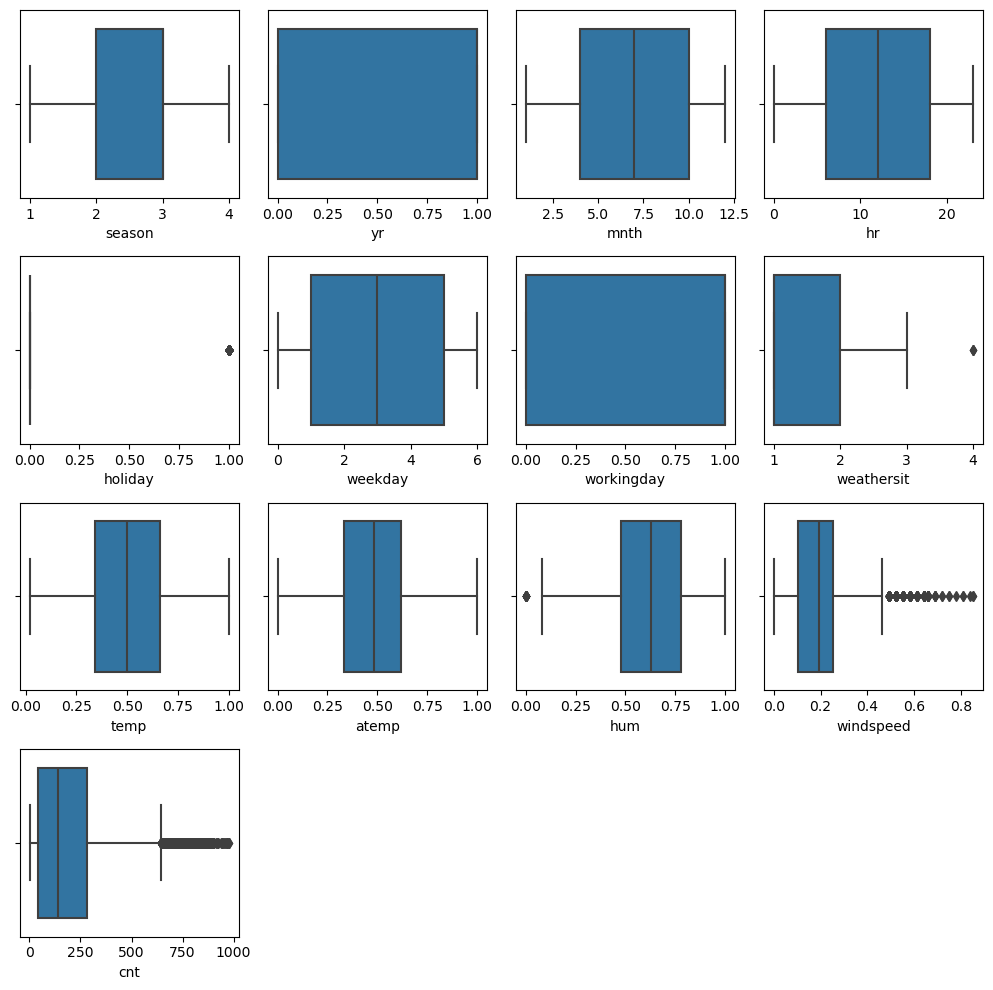

In [14]:
# CHECKING FOR OUTLIERS

plt.figure(figsize=(10,10))
plot=1

for i in df.iloc[::10]:
     ax= plt.subplot(4,4,plot)
     sns.boxplot(x=df[i])
     plot +=1
plt.tight_layout()

## HUMIDITY COLUMN

<Axes: ylabel='Density'>

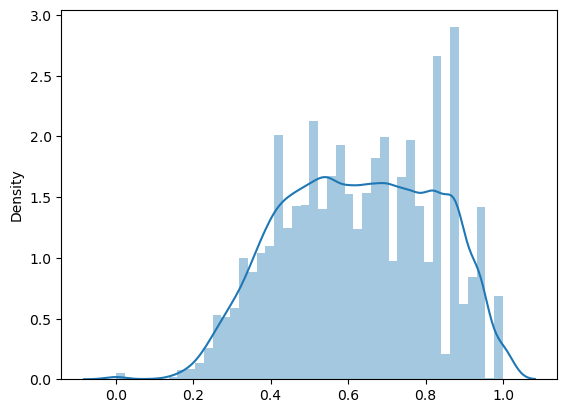

In [15]:
sns.distplot(x=df["hum"])

this visualization shows abnormal distributuion so we use IQR Method 

In [16]:
# IQR METHOD
Q1=df["hum"].quantile(0.25)
Q3=df["hum"].quantile(0.75)

IQR=Q3-Q1
IQR

0.30000000000000004

In [17]:
lower=Q1-1.5*IQR
lower

0.029999999999999916

In [18]:
upper=Q3+1.5*IQR
upper

1.23

In [19]:
df.loc[df["hum"]<lower]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1551,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3
1552,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,2
1553,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,1
1554,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,3
1555,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,12
1556,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,37
1557,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,44
1558,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,24
1559,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,17
1560,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,11


In [20]:
df.loc[df["hum"]>upper]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [21]:
len(df.loc[df["hum"]<lower])/len(df)*100

0.1265895621151965

In [22]:
df["hum"].median()

0.63

In [23]:
df.loc[df["hum"]<lower]=df["hum"].median()


<Axes: xlabel='hum'>

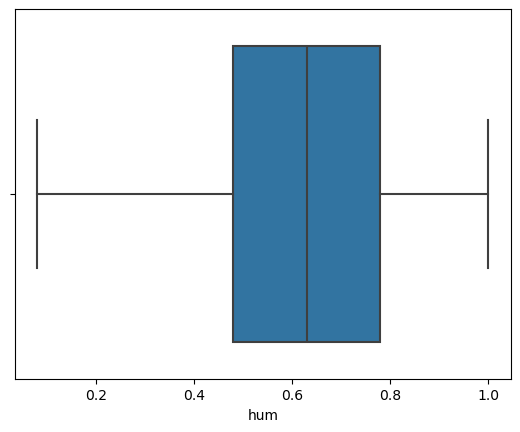

In [24]:
sns.boxplot(x=df["hum"])

## WINDSPEED COLUMN

<Axes: ylabel='Density'>

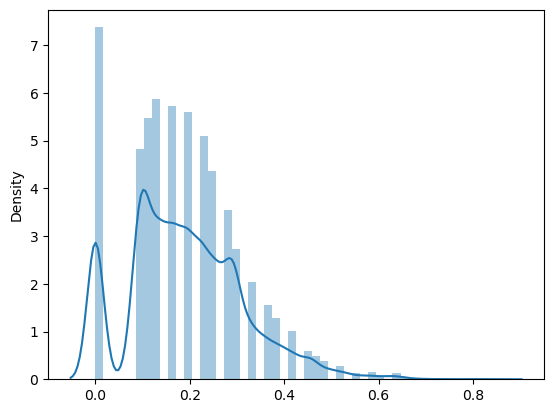

In [25]:
sns.distplot(x=df["windspeed"])

This visualization shows abnormal distribution show we use iqr

In [26]:
# IQR METHOD

Q1=df["windspeed"].quantile(0.25)
Q3=df["windspeed"].quantile(0.75)

IQR=Q3-Q1
IQR

0.1492

In [27]:
lower=Q1-1.5*IQR
lower

-0.1193

In [28]:
upper=Q3+1.5*IQR
upper

0.4775

In [29]:
df.loc[df["windspeed"]<lower]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [30]:
df.loc[df["windspeed"]>upper]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
175,1.0,0.0,1.0,14.0,0.0,6.0,0.0,1.0,0.20,0.1667,0.32,0.4925,95.0
178,1.0,0.0,1.0,17.0,0.0,6.0,0.0,1.0,0.16,0.1212,0.37,0.5522,69.0
194,1.0,0.0,1.0,9.0,0.0,0.0,0.0,1.0,0.12,0.0758,0.46,0.5224,19.0
196,1.0,0.0,1.0,11.0,0.0,0.0,0.0,1.0,0.16,0.1212,0.40,0.5224,49.0
265,1.0,0.0,1.0,12.0,0.0,3.0,1.0,1.0,0.20,0.1515,0.47,0.5821,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,1.0,1.0,12.0,20.0,0.0,6.0,0.0,2.0,0.30,0.2424,0.56,0.5522,66.0
17328,1.0,1.0,12.0,21.0,0.0,6.0,0.0,2.0,0.28,0.2424,0.56,0.4925,60.0
17341,1.0,1.0,12.0,10.0,0.0,0.0,0.0,1.0,0.26,0.2121,0.41,0.5821,122.0
17343,1.0,1.0,12.0,12.0,0.0,0.0,0.0,1.0,0.28,0.2273,0.36,0.5821,144.0


In [31]:
len(df.loc[df["windspeed"]>upper])/len(df)*100

2.0887277749007422

In [32]:
df["windspeed"].median()

0.194

In [33]:
df.loc[df["windspeed"]>upper,"windspeed"]=df["windspeed"].median()

<Axes: xlabel='windspeed'>

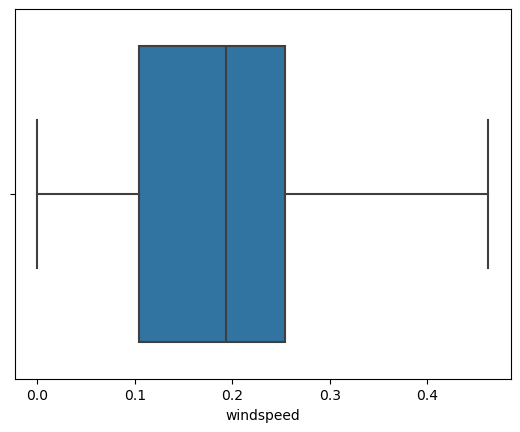

In [34]:
sns.boxplot(x=df["windspeed"])

## CNT COLUMN

<Axes: ylabel='Density'>

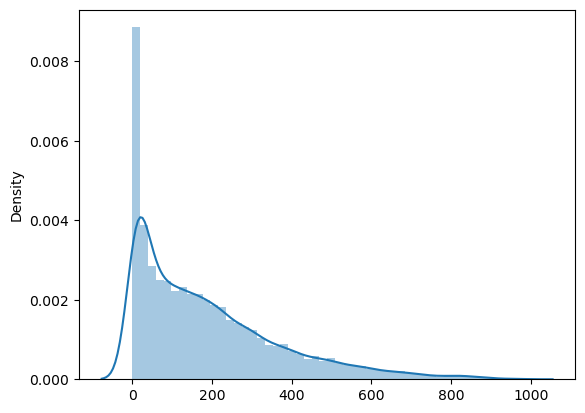

In [35]:
sns.distplot(x=df["cnt"])

This visualization shows abnormal distribution show we use iqr

In [36]:
# IQR METHOD

Q1=df["cnt"].quantile(0.25)
Q3=df["cnt"].quantile(0.75)

IQR=Q3-Q1
IQR

241.0

In [37]:
lower=Q1-1.5*IQR
lower

-321.5

In [38]:
upper=Q3+1.5*IQR
upper

642.5

In [39]:
df.loc[df["cnt"]<lower]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [40]:
df.loc[df["cnt"]>upper]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
5536,3.0,0.0,8.0,14.0,0.0,2.0,1.0,1.0,0.72,0.6515,0.30,0.0896,651.0
10358,1.0,1.0,3.0,17.0,0.0,1.0,1.0,2.0,0.62,0.6212,0.38,0.4179,644.0
10359,1.0,1.0,3.0,18.0,0.0,1.0,1.0,2.0,0.60,0.6212,0.43,0.1940,712.0
10382,1.0,1.0,3.0,17.0,0.0,2.0,1.0,1.0,0.70,0.6364,0.37,0.1045,676.0
10383,1.0,1.0,3.0,18.0,0.0,2.0,1.0,1.0,0.70,0.6364,0.34,0.2985,734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,4.0,1.0,12.0,8.0,0.0,2.0,1.0,2.0,0.34,0.3030,0.61,0.2985,724.0
16909,4.0,1.0,12.0,8.0,0.0,3.0,1.0,2.0,0.26,0.2576,0.65,0.1642,688.0
16933,4.0,1.0,12.0,8.0,0.0,4.0,1.0,1.0,0.24,0.2273,0.60,0.1940,679.0
17053,4.0,1.0,12.0,8.0,0.0,2.0,1.0,1.0,0.38,0.3939,0.94,0.0000,662.0


In [41]:
df['cnt'] = df['cnt'].apply(lambda x: upper if x > upper else x) 

In [42]:
len(df.loc[df["cnt"]>upper])/len(df)*100

0.0

In [43]:
df["cnt"].median()

142.0

In [44]:
df.loc[df["cnt"]>upper]=df["cnt"].median()

<Axes: xlabel='cnt'>

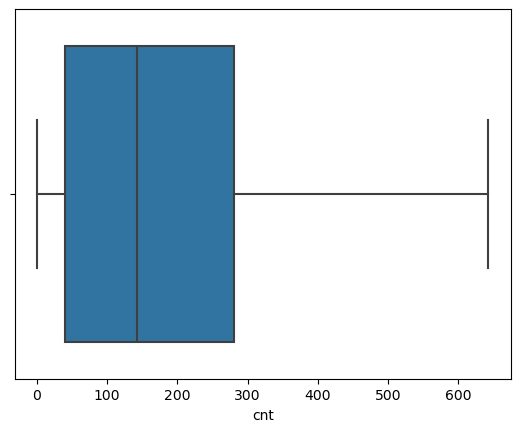

In [45]:
sns.boxplot(x=df["cnt"])

# FEATURE SELECTION

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'season'),
  Text(0, 1.5, 'yr'),
  Text(0, 2.5, 'mnth'),
  Text(0, 3.5, 'hr'),
  Text(0, 4.5, 'holiday'),
  Text(0, 5.5, 'weekday'),
  Text(0, 6.5, 'workingday'),
  Text(0, 7.5, 'weathersit'),
  Text(0, 8.5, 'temp'),
  Text(0, 9.5, 'atemp'),
  Text(0, 10.5, 'hum'),
  Text(0, 11.5, 'windspeed'),
  Text(0, 12.5, 'cnt')])

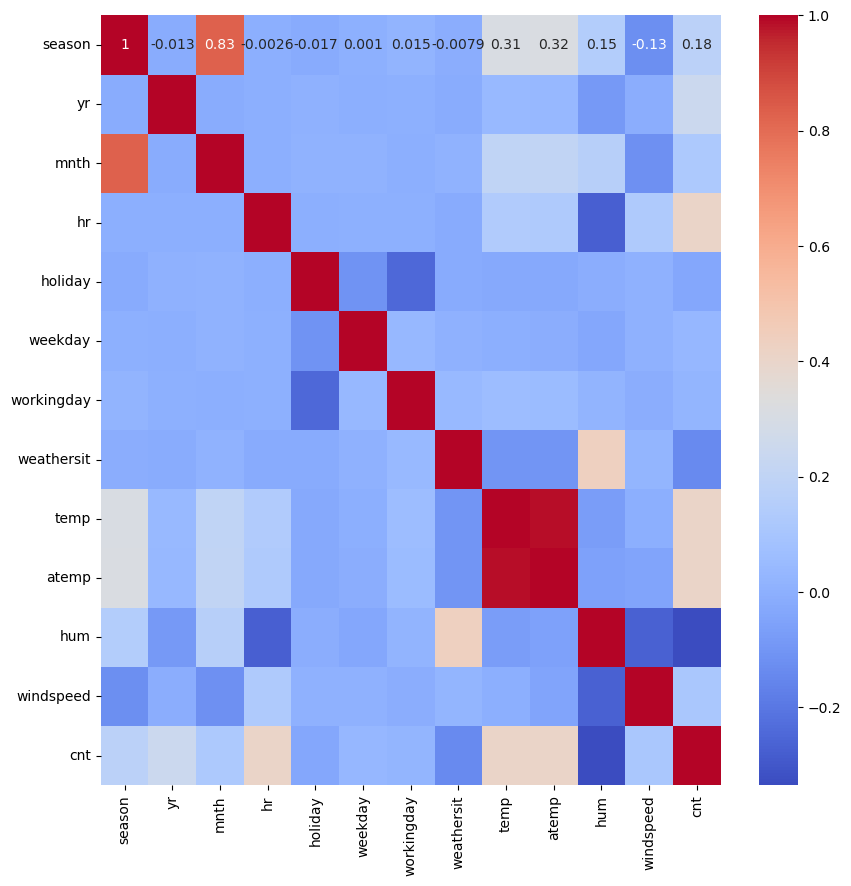

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",annot_kws={"size":10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [52]:
df=df.drop(["atemp"],axis=1)

## FEATURE ENGINEERING

In [48]:
dt=pd.DataFrame({
    "season":["spring","summer","fall","winter"],
    "weather":["clear","cloudy","lightsnow","heavy rain"]
})


encoded_data=pd.get_dummies(dt,columns=["season","weather"],drop_first=True)
print(encoded_data)

   season_spring  season_summer  season_winter  weather_cloudy  \
0           True          False          False           False   
1          False           True          False            True   
2          False          False          False           False   
3          False          False           True           False   

   weather_heavy rain  weather_lightsnow  
0               False              False  
1               False              False  
2               False               True  
3                True              False  


# MODEL BUILDING

This dataset is a Supervised Machine Learing and The output column 'cnt' is a Numerical data so we have choosed Regression model

In [49]:
# SPLITTING X AND Y
x=df.drop('cnt',axis=1)
y=df['cnt']

cnt
642.5    505
5.0      260
6.0      236
4.0      231
3.0      222
        ... 
599.0      2
630.0      1
548.0      1
629.0      1
636.0      1
Name: count, Length: 642, dtype: int64

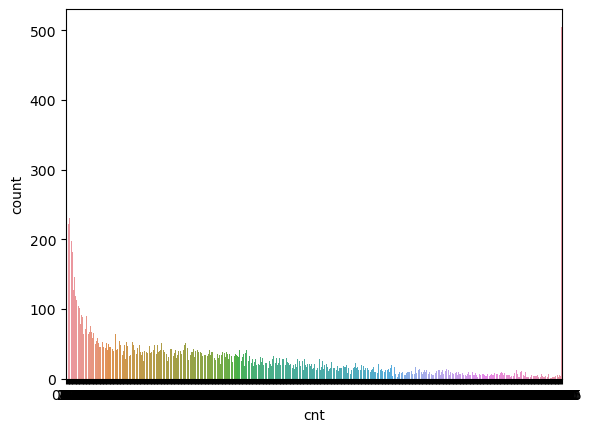

In [50]:
sns.countplot(x=df["cnt"])
df.loc[:,"cnt"].value_counts()

# MODEL 1-LINEAR REGRESSION

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [52]:
#IMPORTING THE MODEL LIBRARIES
from sklearn.linear_model import LinearRegression

#INIT
model=LinearRegression()

#FITTING
model.fit(x_train,y_train)

LinearRegression()

In [53]:
#PREDICT
y_pred=model.predict(x_test)
y_pred

array([347.54417813, 372.74038719, 129.66832928, ..., 217.67286969,
        97.46804787, 185.78743458])

# EVALUATION OF THE MODEL

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mae

100.52470438488567

In [60]:
mse = mean_squared_error(y_test,y_pred)
mse

17310.319212495593

In [61]:
rmse = mse ** 0.5
rmse

131.56868629159294

In [62]:
r2 = r2_score(y_test, y_pred)
r2

0.40062094604040366

### The model performance for Linear Regression is 40%

# MODEL-2 RANDOM FOREST REGRESSION

In [63]:
#IMPORTING THE MODEL LIBRARIES 
from sklearn.ensemble import RandomForestRegressor

#INIT
model2= RandomForestRegressor(n_estimators=80, max_depth=None, random_state=42)

#FITTING
model2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=80, random_state=42)

In [64]:
#PREDICT
y_pred2=model2.predict(x_test)
y_pred2

array([139.25  , 269.85  , 318.6875, ..., 277.6   ,  96.5   , 238.    ])

# EVALUATION OF THE MODEL

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [67]:
mse = mean_squared_error(y_test, y_pred2)
mse

1684.1933322450757

In [68]:
rmse = mse ** 0.5
rmse

41.03892459903251

In [69]:
r2 = r2_score(y_test, y_pred2)
r2

0.9416839057804653

### The model performance for Random Forest Regression is 94%

# MODEL-3 SVR

In [70]:
#IMPORTING THE PREPROCESSOR LIBRARIES 
from sklearn.preprocessing import StandardScaler

#SCALLER
scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.transform(x_test)

In [72]:
#IMPORTING THE MODEL LIBRARIES 
from sklearn.svm import SVR

#INIT
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)


# TRAIN THE MODEL
svr.fit(x_train,y_train)

SVR()

In [73]:
#PREDICT
y_pred3 = svr.predict(x_test)
y_pred3

array([215.026533  , 255.62887822,  99.91900032, ..., 178.3479372 ,
        93.93624993, 154.25714493])

# EVALUATION OF THE MODEL

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [74]:
mse = mean_squared_error(y_test, y_pred3)
mse

17194.783346663255

In [75]:
rmse = mse ** 0.5
rmse

131.1288806734171

In [76]:
r2 = r2_score(y_test, y_pred3)
r2

0.4046214371411686

### The model performance for SVR is 40%

# MODEL-4 XG BOOSTING 

In [81]:
#IMPORTING THE MODEL LIBRARIES
from xgboost import XGBRegressor

#INIT
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)   


# FITTING THE MODEL
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [82]:
#PREDICT
y_pred = xgb_model.predict(x_test)
y_pred

array([150.71858, 319.9668 , 253.71437, ..., 288.80106, 141.43211,
       235.37677], dtype=float32)

# EVALUATE THE MODEL 

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [84]:
mse = mean_squared_error(y_test, y_pred)
mse

3791.995857110193

In [85]:
r2 = r2_score(y_test, y_pred)
r2

0.8687001168752135

## The model performance for XG BOOSTING is 86%

# MODEL-5 KNN

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
#importing the preprocessor libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [108]:
#IMPORTING THE MODEL LIBRARIES
from sklearn.neighbors import KNeighborsRegressor

#INIT
knn = KNeighborsRegressor(n_neighbors=5)

#FITTING
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [115]:
#PREDICT
y_pred = knn.predict(x_test_scaled)
y_pred

array([447. , 163.4, 136. , ...,  98.6, 275.8, 228. ])

# EVALUATE THE MODEL

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [111]:
mse = mean_squared_error(y_test, y_pred)
mse

9770.75423762946

In [112]:
r2 = r2_score(y_test, y_pred)
r2

0.6565783304487813

## The model performance for KNN is 65%

# KEY FINDINGS

1.Random Forest Classifier performed the best,X Gradient Boosting gave us the second highest accuracy value.

2.we also compared with other algorithms like Linear Regression,SVR,Knn.

# CHALLENGES FACED:

while analysing the dataset we had two datasets where Both the files hour.csv and day.csv had the same fields, except hr column which is not available in day.csv so we were confused what to choose then as the problem statement was to predict based on environmental and seasonal settings so we choosed day dataset because the hour column was not that much supporting to the problem statement